<a href="https://colab.research.google.com/github/joseazev/Data_Science_Analise_de_Filmes/blob/main/Primeiro_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise da dataset <font color='blue'>**MovieLens**</font>

A base de dados utilizada será utilizada é a <font color='blue'>**ml-latest-small**</font>

---

```
Importando a biblioteca pandas e visualizando uma amostra do data frame
```

In [7]:
import pandas as pd

notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


```
Traduzindo os cabeçalhos das colunas.
```

In [8]:
 notas.columns = ['usuarioId','filmeID','nota','momento']

 notas.head()

,usuarioId,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


```
Visualizar as notas únicas dentro do data frame.
```

In [9]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

```
Visualizar as frequências das notas
```

In [10]:
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

```
melhorando a visualização dos valores de frequência 
```

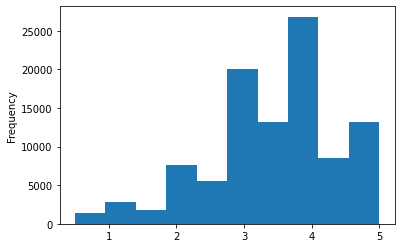

In [11]:
notas.nota.plot(kind='hist')

```
Obter a média e a medianda das notas
```

In [12]:
print(f'A media das notas é {notas.nota.mean()}')
print(f'A mediana das notas é de {notas.nota.median()}')

A media das notas é 3.501556983616962
A mediana das notas é de 3.5


```
Trazendo informações mais completas
```

In [13]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

```
Melhorando a visualização 

importando a biblioteca seaborn e visualizando dados com grafico boxplot
```

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


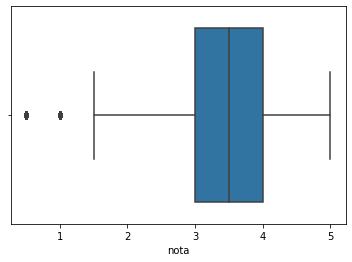

In [14]:
import seaborn as sns

sns.boxplot(notas.nota)

```
Importando o arquico de filmes
```

In [15]:
filmes = pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


```
Traduzindo o o título das colunas
```

In [16]:
filmes.columns = ['filmeId','titulo','genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


```
Obtendo a media de notas de Toy Story e Jumanji
```

In [17]:
print(f'Media do filme Toy Story é {notas.query("filmeID == 1").mean().nota:}')
print(f'Média do filme Jumaji é {notas.query("filmeID == 2").mean().nota}')

Media do filme Toy Story é 3.9209302325581397
Média do filme Jumaji é 3.4318181818181817


```
Obtendo média de todos os filmes
```

In [18]:
media_de_notas = notas.groupby("filmeID").mean().nota
media_de_notas

filmeID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

Distribuição das medias de notas dos filmes

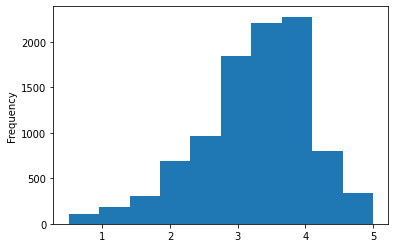

In [19]:
media_de_notas.plot(kind = 'hist')

In [20]:
media_de_notas.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

```
Importanto a biblioteca matplotlib para melhorarar a experiencia com os gráficos
```

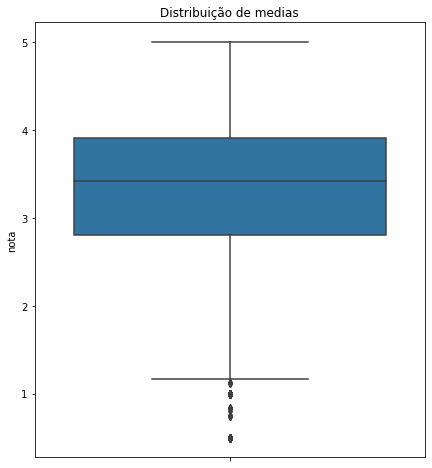

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,8))
plt.title('Distribuição de medias')
sns.boxplot(y = media_de_notas)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


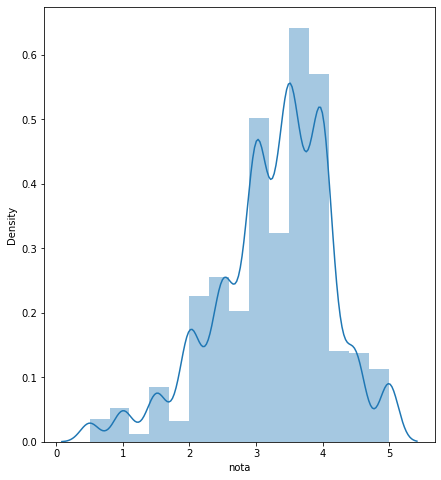

In [22]:
plt.figure(figsize=(7,8))
sns.distplot(media_de_notas, bins=15)

#Analise dos dados TMDB

## Importando a base de dados

```
. Importando arquivo TMDB
  . Trazer base de dados
. Apresentando as 5 primeiras linhas
  . Verificar se não houve erro 
  . Facilitar o acesso as colunas
```

In [23]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


## Verificando os dados únicos da coluna **original_language**

```
Entendendo a base de dados / regra de negócio
```

In [24]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

##Verificando os dados únicos da coluna da coluna **vote_average**


In [25]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

## Analisando a frequência de idiomas dos filmes


In [26]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

### vendo a estrutura da serie
```
Fins didáticos
```

Nesta sessão, é para mostrar que o resultado da função value_coutns() é uma serie, e veremos que a serie só tem as colunas index e values.

In [27]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [28]:
tmdb.original_language.value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

### Criando um dataframe apartir do resultado do value_counts

1. value_counts()
  . fazendo a contagem de frequencias do campo original_language
2. to_frame()
  . transformando a serie em data frame
3. reset_index()
  . refazer o index do data frame tornando o antigo indice em coluna


In [29]:
contagem_de_liguas = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_liguas.head()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


Modificando o nome das colunas

In [30]:
contagem_de_liguas.columns = ['original_language','total']
contagem_de_liguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


## Iniciando o estudo dos dados

Criando um gráfico de barras para melhor visualizar os dados.

```
Criando bons graficos
```

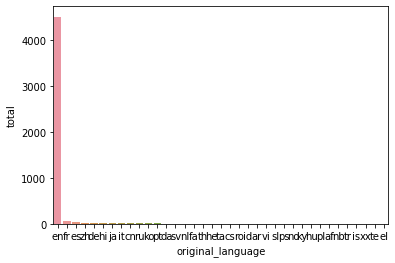

In [31]:
sns.barplot(x='original_language', y='total', data=contagem_de_liguas)

Criando um grafico de categoria com ferramentas Seaborn

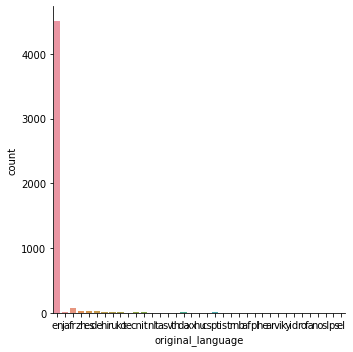

In [32]:
sns.catplot(x='original_language', kind='count', data=tmdb)

```
Criando graficos não tão bons assim
```

([<matplotlib.patches.Wedge at 0x7f2db17f07d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

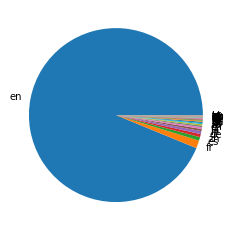

In [33]:
plt.pie(contagem_de_liguas['total'], 
        labels=contagem_de_liguas['original_language'], 
        data=contagem_de_liguas)

 ## Analisando a relevanicia da lingua inglesa para produção de filmes

1. Contando a frequsncia de todos os idiomas
2. Achando o total de filmes
3. Achando a quantidade de filmes em inglês
4. Achando o total de todos os idiomas menos o ingles
5. Montando um data frame com essas informações

In [34]:
total_por_idioma = tmdb.original_language.value_counts()
total_de_filmes = total_por_idioma.sum()
total_de_ingles = total_por_idioma.loc['en']
total_de_outros = total_de_filmes - total_de_ingles

idioma_de_filmes = {
    'idiomas': ['Ingles', 'outros'],
    'total': [total_de_ingles,total_de_outros]
}

idioma_de_filmes = pd.DataFrame(idioma_de_filmes)
idioma_de_filmes

,idiomas,total
0,Ingles,4505
1,outros,298


>Um bom gráfico

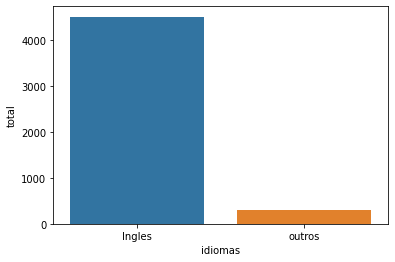

In [35]:
sns.barplot(x='idiomas', y='total', data=idioma_de_filmes)

> Um gráfico não tão bom assim

([<matplotlib.patches.Wedge at 0x7f2db1641050>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'Ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

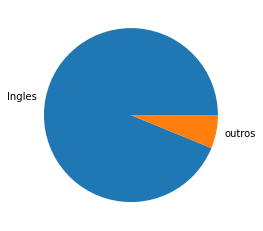

In [36]:
plt.pie(idioma_de_filmes['total'], 
        labels=idioma_de_filmes['idiomas'], 
        data=idioma_de_filmes)

## Melhorando a visualização para a frequencia de filmes de linguas não inglesas.

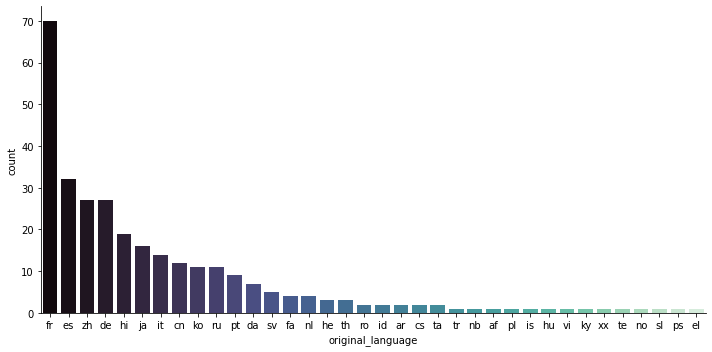

In [37]:
# Capturando os filmes de linguas não inglesa
filmes_sem_idioma_ingles = tmdb.query("original_language != 'en'")
# Calculando a frenquencia de filmes
quantidade_filmes_sem_idioma_ingles = filmes_sem_idioma_ingles.original_language.value_counts()

# Melhorando a vizualição de frequencia 
sns.catplot(x = "original_language",                           # informando qual é a coluna que assumirar o eixo X
            kind = "count",                                    # O que será feito no agrupamento 
            data = filmes_sem_idioma_ingles,                   # base de dados
            aspect = 2,                                        # Mudar o aspecto do plot de quadrado para retangular 
            order = quantidade_filmes_sem_idioma_ingles.index, # definição da ordem de apresentação do eixo x
            palette = "mako")                                  # Definição de paleta de cores graficos

# Revisando Media, Mediana, Desvio Padrão.

In [38]:
# Descobrindo quais são os dois primeiros filmes da base de dados
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [39]:
notas.columns

Index(['usuarioId', 'filmeID', 'nota', 'momento'], dtype='object')

In [40]:
notas_do_filme_toystory = notas.query("filmeID == 1")
notas_do_filme_jumanji = notas.query("filmeID == 2")
print(len(notas_do_filme_toystory), len(notas_do_filme_jumanji))

215 110


In [41]:
print(f'A media de notas do filme Toy Story é {notas_do_filme_toystory.nota.mean():.2f}')
print(f'A media de notas do filme Jumanji é {notas_do_filme_jumanji.nota.mean():.2f}')

A media de notas do filme Toy Story é 3.92
A media de notas do filme Jumanji é 3.43


In [42]:
print(f'A mediana da nota do filme Toy Story é {notas_do_filme_toystory.nota.median()}')
print(f'A mediana da nota do filme Jumanji é {notas_do_filme_jumanji.nota.median()}')

A mediana da nota do filme Toy Story é 4.0
A mediana da nota do filme Jumanji é 3.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


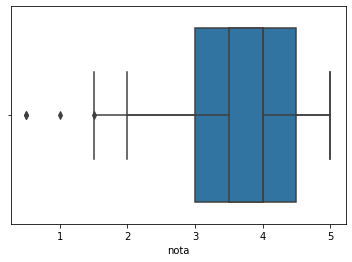

In [43]:
sns.boxplot(notas_do_filme_toystory.nota)
sns.boxplot(notas_do_filme_jumanji.nota)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f2db14539d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2db14569d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2db1461a10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2db14614d0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2db1453f10>,
  <matplotlib.lines.Line2D at 0x7f2db1468a10>]}

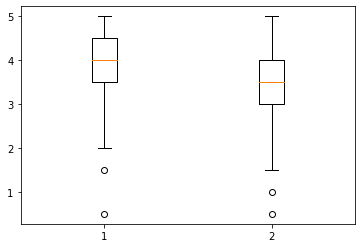

In [44]:
plt.boxplot([notas_do_filme_toystory.nota, notas_do_filme_jumanji.nota])

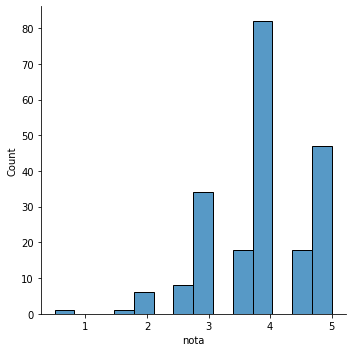

In [60]:
sns.displot(notas_do_filme_toystory.nota)

(array([ 1.,  1.,  2.,  5., 12., 28., 11., 36.,  7.,  7.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

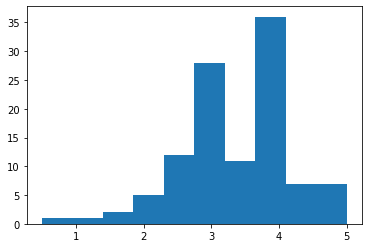

In [62]:
plt.hist(notas_do_filme_jumanji.nota)

In [47]:
notas.columns

Index(['usuarioId', 'filmeID', 'nota', 'momento'], dtype='object')

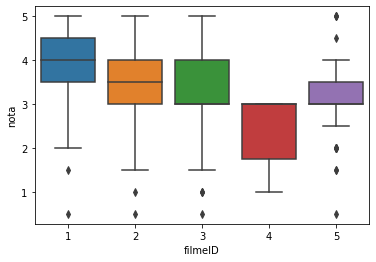

In [50]:
sns.boxplot(x = "filmeID", y = "nota", data = notas.query("filmeID in [1,2,3,4,5]"))

In [54]:
print(f"O edsvio padrão do filme Toy Story é {notas_do_filme_toystory['nota'].std()}")
print(f"O edsvio padrão do filme Jumanji é {notas_do_filme_jumanji['nota'].std()}")

O edsvio padrão do filme Toy Story é 0.8348591407114045
O edsvio padrão do filme Jumanji é 0.8817134921476455
